## Shared Micromobility Vehicle Trips Data Analysis

### Data Source and API
- AODP Dataset Access: https://data.austintexas.gov/Transportation-and-Mobility/Shared-Micromobility-Vehicle-Trips/7d8e-dm7r
- API Endpoint: https://data.austintexas.gov/resource/7d8e-dm7r.json
- API Documentation: https://dev.socrata.com/foundry/data.austintexas.gov/7d8e-dm7r

To access the dataset host, install SODA API first:
    `pip install sodapy`

### Data Extraction

- Data Provided
    - trip_id
    - device_id
    - modified_date
    - council_district_start
    - council_district_end
    - vehicle_type
    - trip_duration
    - trip_distance
    - start_time
    - end_time
    - month
    - hour
    - day_of_week
    - year
    - census_geoid_start
    - census_geoid_end

In [27]:
# Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import seaborn as sns
import pandas as pd
from sodapy import Socrata

In [28]:
# Output File (CSV)
output_data_file = "Output_Data/shared_mobility.csv"

In [29]:
# url = https://data.austintexas.gov/resource/7d8e-dm7r.json
# Data Extraction:
client = Socrata("data.austintexas.gov", None)

results = client.get("7d8e-dm7r", limit=83000000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [30]:
results_df.head()

,trip_id,device_id,modified_date,council_district_start,council_district_end,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305


In [35]:
# Check for missing values:
results_df.count()

trip_id                   8377201
device_id                 8377201
modified_date             8377201
council_district_start    8377067
council_district_end      8377067
vehicle_type              8377200
trip_duration             8377200
trip_distance             8377200
start_time                8377200
end_time                  8377200
month                     8377200
hour                      8377200
day_of_week               8377200
year                      8377200
census_geoid_start        8377065
census_geoid_end          8377065
dtype: int64

In [36]:
missing_vehicle_type = results_df["vehicle_type"].isnull().sum()
print(f"There are {missing_vehicle_type} missing vehicle types.")
missing_month = results_df["month"].isnull().sum()
print(f"There are {missing_month} missing months.")
missing_census_geoid_start = results_df["census_geoid_start"].isnull().sum()
print(f"There are {missing_census_geoid_start} missing census_geoid_start.")

There are 1 missing vehicle types.
There are 1 missing months.
There are 136 missing census_geoid_start.


### Data Cleaning

In [42]:
clean_results_df = results_df.copy()

In [43]:
clean_results_df

,trip_id,device_id,modified_date,council_district_start,council_district_end,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,6865731e-5e4b-4819-9435-4e62e09a652d,08c8c852-257c-49ad-a14f-727bfc79626d,2018-12-13T15:36:12.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08dc0d9c-735e-4006-b9af-60011509e469,255716b5-4a9f-4efc-9967-7a65b3521bac,2018-12-21T00:41:42.000,9,0,bicycle,11491603,1658,2018-11-30T11:00:00.000,2019-04-12T12:00:00.000,11,11,5,2018,NaN,NaN
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8377196,4e95126d-8149-49d8-b091-f96b9ef08dc1,2e65ccbe-c32d-4367-a1ab-4b11e70cbd6e,2020-01-05T07:00:15.000,9,9,scooter,131,83,2020-01-04T17:15:00.000,2020-01-04T17:15:00.000,1,17,6,2020,48453000603,48453000603
8377197,3d4d7871-07fc-4c43-b9f8-1ace5e583374,872dc7d2-970c-4e23-8370-d587035c42e4,2020-01-05T07:00:15.000,9,9,scooter,302,578,2020-01-04T17:15:00.000,2020-01-04T17:15:00.000,1,17,6,2020,48453000604,48453000603
8377198,619ebd23-5f71-40b4-9ed9-34837bb635b9,61f5329d-e740-4f56-8060-a1abe4e10929,2020-01-05T07:00:15.000,9,9,scooter,722,2713,2020-01-04T17:15:00.000,2020-01-04T17:15:00.000,1,17,6,2020,48453001100,48453001401
8377199,c7492c6f-cb48-4a60-930b-3f9f386938b6,5e2448ec-ad22-4147-8813-bfe1ec03e58e,2020-01-05T07:00:15.000,9,9,scooter,944,3043,2020-01-04T17:15:00.000,2020-01-04T17:30:00.000,1,17,6,2020,48453001305,48453001100


In [73]:
clean_results_df = clean_results_df.rename(columns = {
    "trip_id": "Trip ID",
    "device_id": "Device ID",
    "modified_date": "Data Modified Date",
    "vehicle_type": "Vehicle Type",
    "trip_duration": "Trip Duration",
    "trip_distance": "Trip Distance",
    "start_time": "Trip Start Time",
    "end_time": "Trip End Time",
    "hour": "Hour",
    "day_of_week": "Day Of Week",
    "month": "Month",
    "year": "Year",
    "census_geoid_start": "GEOID Start",
    "census_geoid_end": "GEOID End",
    "council_district_start": "Start Council District",
    "council_district_end" : "Return Council District"
})

In [74]:
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27 15:00:00,2019-04-27 15:15:00,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27 15:00:00,2019-04-27 15:15:00,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453001100,48453001305
5,23787175-efa2-46db-9ba6-9d53f9eabd64,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-28T02:42:07.000,9,9,scooter,644,1326,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453001305,48453001100
6,8353d103-166b-4958-aa7d-07c59cc8ef5c,10e6b006-c5c5-4012-8f73-1ece7b7d19c1,2019-04-28T02:42:07.000,3,1,scooter,419,1511,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453000902,48453000804


In [50]:
#Find the total number of scooter rides:
scooters = clean_results_df[clean_results_df["Vehicle Type"] == "scooter"]
total_scooters = len(clean_results_df) - scooters.shape[0]
total_scooters

418937

In [52]:
#Find the total number of bicycle rides:
bicycles = clean_results_df[clean_results_df["Vehicle Type"] == "bicycle"]
total_bicycles = len(clean_results_df) - bicycles.shape[0]
total_bicycles

7958265

In [55]:
#Check to tally the total rides 
total_rides = total_bicycles + total_scooters
total_rides

8377202

In [57]:
# Drop all the null values
clean_results_df = clean_results_df.dropna(how='any')
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28T02:42:07.000,1,9,scooter,678,2785,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28T02:42:07.000,9,5,scooter,713,2466,2019-04-27T15:00:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28T02:42:07.000,9,9,scooter,469,1608,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001100,48453001305
5,23787175-efa2-46db-9ba6-9d53f9eabd64,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-28T02:42:07.000,9,9,scooter,644,1326,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453001305,48453001100
6,8353d103-166b-4958-aa7d-07c59cc8ef5c,10e6b006-c5c5-4012-8f73-1ece7b7d19c1,2019-04-28T02:42:07.000,3,1,scooter,419,1511,2019-04-27T15:15:00.000,2019-04-27T15:15:00.000,4,15,6,2019,48453000902,48453000804


In [58]:
# Find the number of unique devices
device_id_list =  clean_results_df["Device ID"].value_counts()
device_id_list

49b0ba01-7c8b-4504-b8b0-ff3380ffce83    848
4478fe94-894f-4c4f-a1ab-a67a70739be5    841
27fda021-2d10-4fd7-a9ba-94a50b3a0fff    828
6cb1120f-282a-4894-89e7-395a13b1f1d0    823
d513ff4d-9b47-4422-bf3a-f686b500e1cd    788
                                       ... 
ba590b63-a04d-43e9-840d-07778af42412      1
49e5bb18-f77f-49e9-87d3-cc45c5bf3336      1
b9d00e11-432c-4398-9c37-5d1147e50e30      1
eb972ca8-dbda-492c-ab8c-9e425ff1957d      1
b57be1ac-2e5a-4ff2-91d2-35d8cc23ebe5      1
Name: Device ID, Length: 71882, dtype: int64

In [61]:
# Find the number of unique GEOIDs where the trips started
start_geoid = clean_results_df["GEOID Start"].value_counts()
start_geoid

48453001100    3227524
48453000601     749898
48453000603     601550
48453000604     514719
48453001305     508645
                ...   
48453001775          1
48209010809          1
48209010808          1
48491021502          1
48453001768          1
Name: GEOID Start, Length: 283, dtype: int64

In [62]:
# Find the number of unique GEOIDs where the trips ended
end_geoid = clean_results_df["GEOID End"].value_counts()
end_geoid

48453001100    3123240
48453000601     824039
48453000603     541860
48453001305     508228
48453000902     458325
                ...   
48453001773          1
48209010804          1
48209010808          1
48021950502          1
48209010905          1
Name: GEOID End, Length: 272, dtype: int64

In [76]:
# Change the time and date format for columns - 'Data Modified Date', 'Trip Start time' and 'Trip End Time'
clean_results_df['Trip Start Time'] = pd.to_datetime(clean_results_df['Trip Start Time'])
clean_results_df['Trip End Time'] = pd.to_datetime(clean_results_df['Trip End Time'])
clean_results_df['Data Modified Date'] = pd.to_datetime(clean_results_df['Data Modified Date'])
clean_results_df.head()

,Trip ID,Device ID,Data Modified Date,Start Council District,Return Council District,Vehicle Type,Trip Duration,Trip Distance,Trip Start Time,Trip End Time,Month,Hour,Day Of Week,Year,GEOID Start,GEOID End
2,92b80c20-89a4-4c7f-8b61-81a3570a218e,4d1e7bd0-75ce-401c-a802-8dd87122f802,2019-04-28 02:42:07,1,9,scooter,678,2785,2019-04-27 15:00:00,2019-04-27 15:15:00,4,15,6,2019,48453001100,48453001100
3,d9aef7c5-025d-4f2c-bafe-7801f89ef9dd,fdc38815-fe35-454b-bfb9-a63a2f2c205b,2019-04-28 02:42:07,9,5,scooter,713,2466,2019-04-27 15:00:00,2019-04-27 15:15:00,4,15,6,2019,48453001305,48453001901
4,baec3b6e-66f1-4043-bbd5-d54087f1c2de,007f1fed-0fe6-423f-8ca7-cd67834f20da,2019-04-28 02:42:07,9,9,scooter,469,1608,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453001100,48453001305
5,23787175-efa2-46db-9ba6-9d53f9eabd64,672b17a6-6916-4f4e-a4e4-8168d623f638,2019-04-28 02:42:07,9,9,scooter,644,1326,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453001305,48453001100
6,8353d103-166b-4958-aa7d-07c59cc8ef5c,10e6b006-c5c5-4012-8f73-1ece7b7d19c1,2019-04-28 02:42:07,3,1,scooter,419,1511,2019-04-27 15:15:00,2019-04-27 15:15:00,4,15,6,2019,48453000902,48453000804


### Visualization of the Clean Data Set

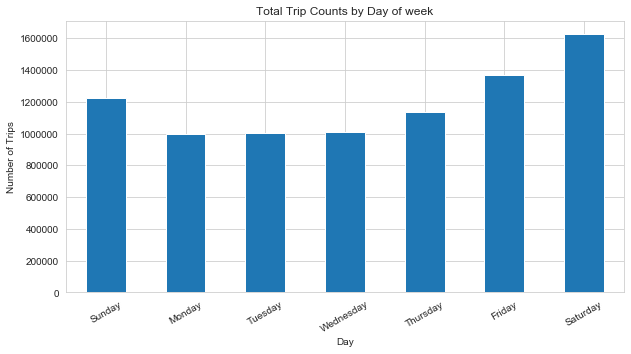

In [134]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(clean_results_df['Day Of Week'].value_counts().sort_index())

# Map day of week for better labels. Data documentation indicates "0=Sunday and so on.""
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_total['Day'] = days

# Plot
daily_total.plot(kind='bar', x='Day', y='Day Of Week', title='Total Trip Counts by Day of week', figsize = (10,5), rot= 30, legend=False)
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_week.png")
plt.show()

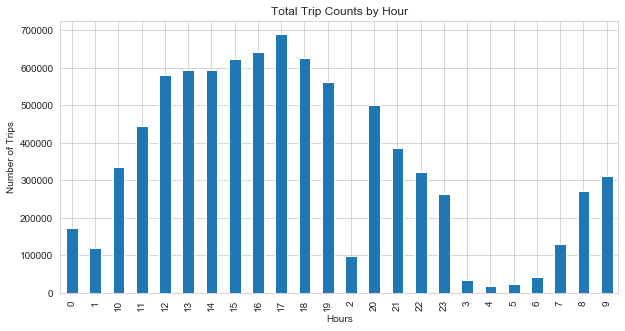

In [157]:
# Count trips per hour and sort by hour:
hourly_total = pd.DataFrame(clean_results_df['Hour'].value_counts().sort_index())
#hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18', '19','20','21','22','23']
#hours = ['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9']
#hourly_total['Hours'] = hours

hourly_total.reset_index().plot(kind='bar', x='index', y='Hour', title='Total Trip Counts by Hour', figsize = (10,5), legend=False)
plt.xlabel('Hours')
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_hour.png")
plt.show()
#now shows correct plot but xticks not sorted

In [158]:
hourly_total

,Hour
0,171044
1,119884
10,334004
11,444866
12,580690
13,594288
14,593876
15,622688
16,642286
17,690749


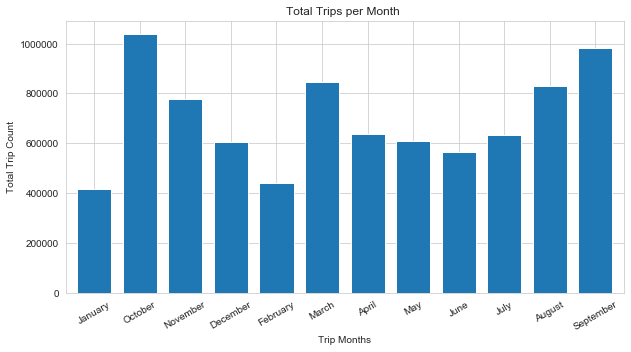

In [154]:
monthly_total = pd.DataFrame(clean_results_df['Month'].value_counts()).sort_index()
import calendar
mn=[calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]
monthly_chart = monthly_total.plot.bar(title = "Total Trips per Month ",width = 0.75,figsize = (10,5),rot = 30, legend = False)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Trip Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.savefig("Plots/trips_per_month1.png")
plt.show()
#shows correct plot but xticks not sorted

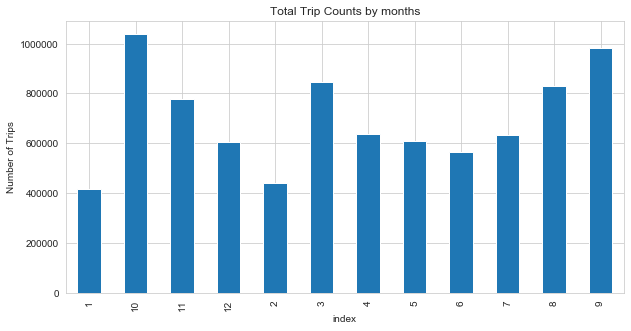

In [159]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_total['Months'] = month_list
monthly_total.reset_index().plot(kind='bar', x='index', y='Month', title='Total Trip Counts by months', figsize = (10,5), legend=False)
plt.ylabel('Number of Trips')
plt.savefig("Plots/trips_per_month2.png")
plt.show()
#This graph seems to give wrong mapped values

ValueError: shape mismatch: objects cannot be broadcast to a single shape

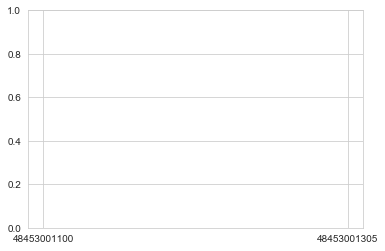

In [160]:
# Count how many trips started in each census GEOID tract
census_trip_start['Total Trips'] = pd.DataFrame(clean_results_df['GEOID Start'].value_counts())

# Count how many trips ended in each census tract
census_trip_end = pd.DataFrame(clean_results_df['GEOID End'].value_counts())

plt.bar(clean_results_df["GEOID Start"], census_trip_start ['Total Trips'])
plt.title("Total Count of trips starting per Census Tract")
plt.xlabel("GEOID ID")
plt.ylabel("Total Trips")

plt.show()